# Lending Clug Neural Network Classification Project

***By: Alex Mason***

  Hello and welcome to this notebook! This notebook uses a variety of data visualizations to look further into a lending club dataset containing information on applicants that recieved loans after their application was submitted and others that were rejected.
  After examining the data visually, we begin to preprocess our data and clean up some of the data columns.
  Finally, we build a neural network to predict whether an individual is likely to be approved for a loan or not. The goal of this will help to determine if an individual is likely to pay back their loan or not to the given lender.

We will start by viewing a description for each given column in this data set, followed by importing some key libraries necessary for this project: 

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

We then start by creating a function that returns the desciptions of the given columns which is provided in another excel spreadsheet. 

In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('../Data Science NN Project/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


## Load in data and other imports 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

As the dataset we will be using is too large a file to upload to a repository, I will provide the link to the dataset below:

https://www.kaggle.com/wordsforthewise/lending-club

**Note**: I have also made several alterations to the dataset so that is standardized for the use of this project. 

In [7]:
df = pd.read_csv('../Data Science NN Project/lending_club_loan_two.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## Exploratory Data Analysis

Create countplot for whether the loan was fully paid or charged off 

<AxesSubplot:xlabel='loan_status', ylabel='count'>

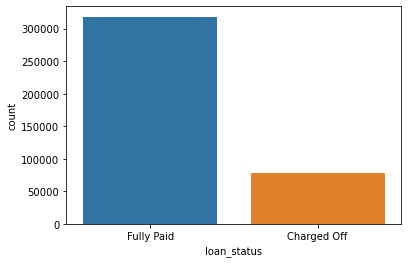

In [9]:
sns.countplot(x='loan_status',data=df)

Create hisogram of the loan_amount that people are borrowing 

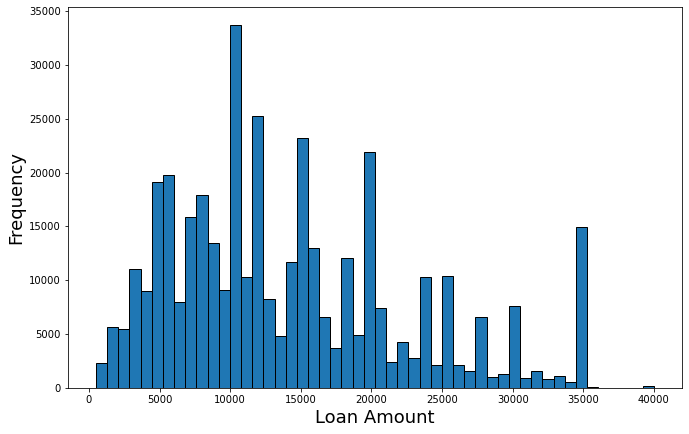

In [10]:
plt.figure(figsize=(11,7))
plt.xlabel('Loan Amount', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.hist(x='loan_amnt', data=df, bins=50, ec='black')
plt.show()

check correlation between the continous feature variables in dataset.

In [11]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


Create a heatmap to view the correlations between column features

(12.5, -0.5)

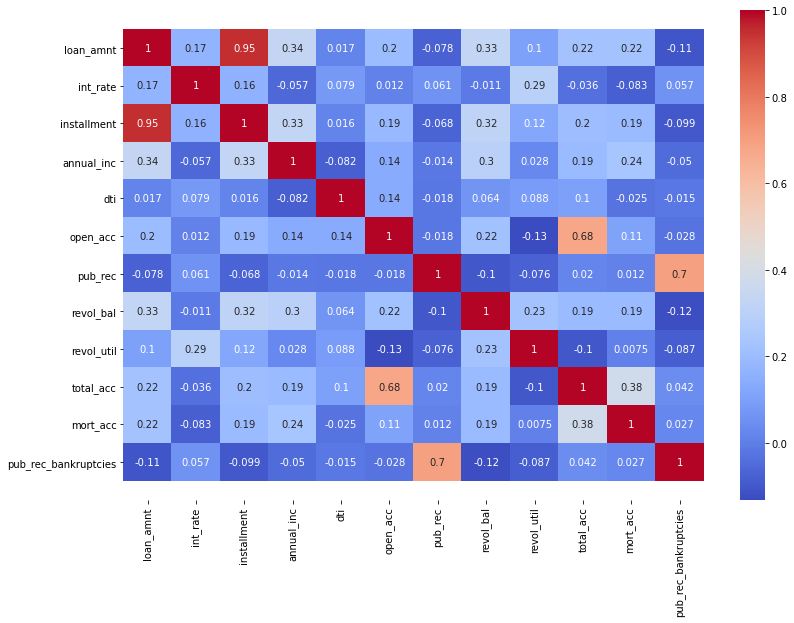

In [12]:
plt.figure(figsize=(13,9))
ax = sns.heatmap(data=df.corr(), cmap='coolwarm', annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

View the information surrounding the Installment column and why it may have such a high correlation to our loan amounts.

In [13]:
print('Installment:')
feat_info('installment')
print('\n')
print('Loan Amount:')
feat_info('loan_amnt')

Installment:
The monthly payment owed by the borrower if the loan originates.


Loan Amount:
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


lets see the relationship by creating a scatterplot between the two variables

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

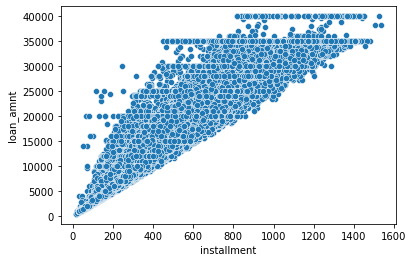

In [14]:
sns.scatterplot(x='installment', y='loan_amnt', data=df)

Lets now view the relationship between the loan status and the loan amount via a boxplot

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

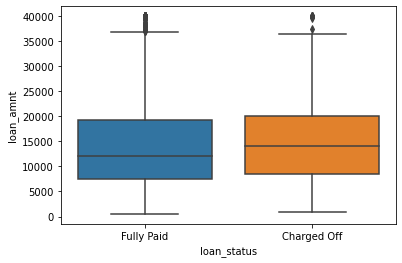

In [15]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

Now lets check some quick statistics for our loan amount grouped by the loan status 

In [16]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


Let's get some more background on the Grade and SubGrade columns that attributes to the given loans. 

In [17]:
grade = df.grade.unique()
sub_grade = df.sub_grade.unique()
print(sorted(grade))
print(sorted(sub_grade))

['A', 'B', 'C', 'D', 'E', 'F', 'G']
['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


As we can see there is almost like a "grade" system when it comes to the type of loan, similar to bonds where you can have a AAA bond vs something like a C Bond where a AAA bond is of the highest rating where a C level bond is very risky. Lets check the number of loans compared to the loan status via a countplot.

<AxesSubplot:xlabel='grade', ylabel='count'>

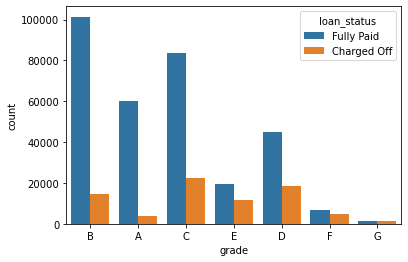

In [18]:
sns.countplot(x='grade', data=df, hue='loan_status')

Now lets check the amount of subgrade loans and the frequency of each

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

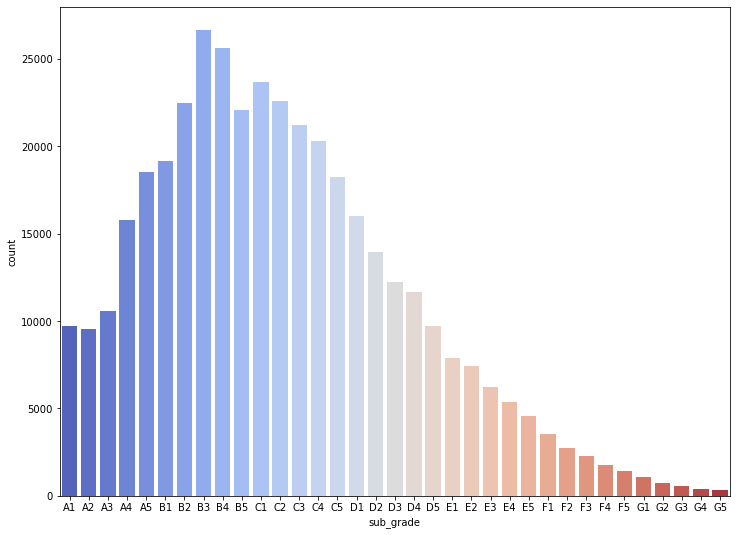

In [19]:
plt.figure(figsize=(12,9))
sub_grade = df.sub_grade.unique()
sns.countplot(x='sub_grade', data=df, palette='coolwarm', order=sorted(sub_grade))

Now, lets do the same but now compare against the loan status

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

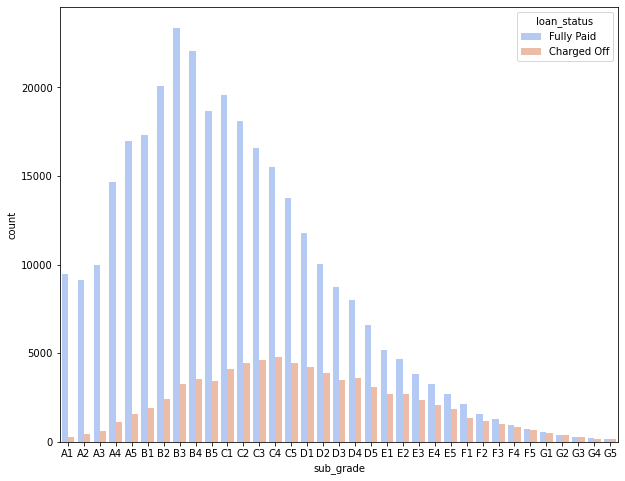

In [20]:
plt.figure(figsize=(10,8))
sub_grade = df.sub_grade.unique()
sns.countplot(x='sub_grade', data=df, palette='coolwarm', order=sorted(sub_grade), hue='loan_status')

As we can note from the plot, F and G subgrades don't get paid back very often. So let's isolate the two grades and plot them.

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

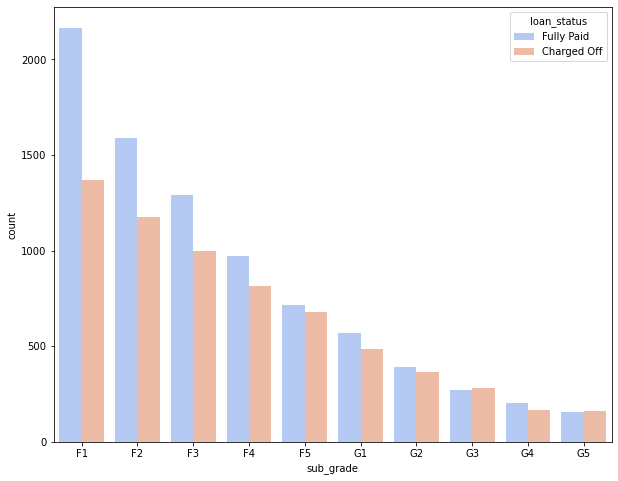

In [21]:
plt.figure(figsize=(10,8))
f_and_g = df[(df['grade'] == 'F') | (df['grade'] == 'G')]
sub_grade = f_and_g.sub_grade.unique()
sns.countplot(x='sub_grade', data=f_and_g, palette='coolwarm', order=sorted(sub_grade), hue='loan_status')

Now lets create a new column that will contain a 1 if a loan is statused as "Fully Paid" and a 0 for "Charged Off"

In [22]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [23]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


Now lets view the correlation between the column features and the new loan_repaid column we just created

<AxesSubplot:>

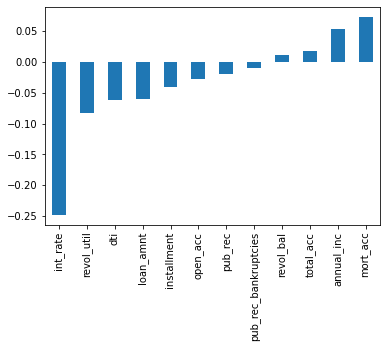

In [24]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

## Section 2: Data Cleaning & Data PreProcessing 

So we should first check to see if there is missing data within our dataframe and see how we can go about fixing that and what columns are worth keeping vs one's we may want to drop. 

In [25]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [26]:
len(df)

396030

Let's view the total count of missing values per column

In [27]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

Let us now look at this information in terms of percentage of the total DataFrame. This may give us a better understanding of what to prioritize first.

In [28]:
percent_df = df.isnull().sum()/len(df)*100
print(percent_df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64


Let's start with the **emp_title** column and learn a little more about the information it contains. 

In [29]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


Hmm, lets view the number of unique employment job titles and see what we are dealing with in a bit more detail.

In [30]:
df['emp_title'].nunique()

173105

In [31]:
df['emp_title'].value_counts()

Teacher               4389
Manager               4250
Registered Nurse      1856
RN                    1846
Supervisor            1830
                      ... 
fuel hauler              1
dekalb co. school        1
VW Credit Inc.           1
System Dispatch          1
level ll inspector       1
Name: emp_title, Length: 173105, dtype: int64

This is going to be very difficult to convert to dummy variables for our model so we can remove the **emp_title** column from our dataframe.

In [32]:
df = df.drop(['emp_title'],axis=1)

Let's move onto the **emp_length** column and view the features that were input.

In [33]:
employ_len = sorted(df['emp_length'].dropna().unique())
print(employ_len)

['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '< 1 year']


As you can see, some of the strings are out of order so we will create a seperate list to order them accordingly.

In [34]:
emp_length_order = [ '< 1 year', '1 year', '2 years', '3 years',
                     '4 years', '5 years', '6 years', '7 years', 
                     '8 years', '9 years', '10+ years']

Now, to display the employment length by year.

<AxesSubplot:xlabel='emp_length', ylabel='count'>

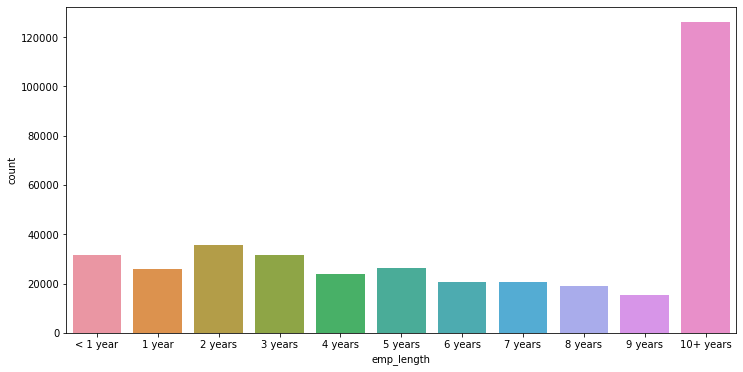

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length', data=df, order=emp_length_order)

Similarly, we can do the same type of plot comparing it against if the laon was fully paid back or if it was charged off. 

<AxesSubplot:xlabel='emp_length', ylabel='count'>

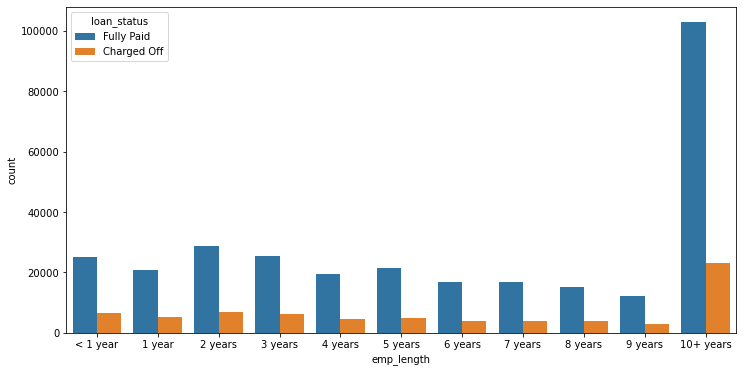

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length', data=df, hue='loan_status', order=emp_length_order)

After viewing this information, we should look to see what the percentage is for charge offs per category. 

In [37]:
paid = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']
notpaid = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']

In [38]:
payout_ratio = (notpaid/paid)
print(payout_ratio)

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64


Now we can do a simple plot of these values:

<AxesSubplot:xlabel='emp_length'>

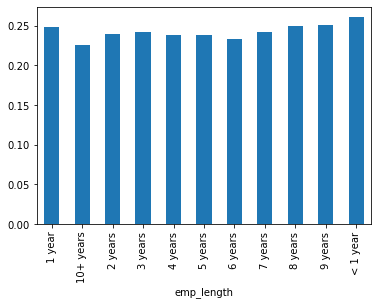

In [39]:
payout_ratio.plot(kind='bar')

We can note that the charge off rates are very similar amongst all employment lengths. Let's go ahead and drop that column.

In [40]:
df = df.drop(['emp_length'], axis=1)

Let's take another peek at our data to see which columns are still missing data. 

In [41]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

Let us now delve into the title column and purpose column to see if there is any redundant data between the two columns. 

In [42]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [43]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

It seems that the title column is just a string description of the purpose column. Let's drop that column.

In [44]:
df = df.drop(['title'], axis=1)

Let's move onto the **mort_acc** feature column and look at what the column data represents.

In [45]:
feat_info('mort_acc')

Number of mortgage accounts.


In [46]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

This information will be of use in our continued analysis so we should not attempt to fill in the missing data using the mean of other columns. This will help us tidy things up a bit and not have to worry about extreme bias in our model.

In [47]:
df[df.columns[1:]].corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

From this, we note that the **total_acc** column correlates most with the **mort_acc** column. Let us now fill in these missing values using the fillna() approach.

In [48]:
df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [49]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [50]:
total_acc_avg[3.0] #Third value

0.05202312138728324

In [51]:
def fillaccts(total_acc, mort_acc):
    """This function will fill any NaN values with the average of the total 
    account column. If there is already a pre-exisiting value, it just keeps the mort_acc
    value in place"""
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [52]:
df['mort_acc'] = df.apply(lambda x: fillaccts(x['total_acc'],x['mort_acc']), axis=1)

In [53]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

As we can see, the only remaining columns with missing data points are the **revol_utl** and **pub_rec_bankruptcies** columns. Checking back to our % of null values in our dataset, these two columns account for less than 0.5% of the total data. Let's go ahead and drop those out. 

In [54]:
print(df.shape)
df = df.dropna()
print(df.shape)

(396030, 25)
(395219, 25)


In [55]:
df.isnull().sum() # no more null values 

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Column Variables and Assigning Dummy Variables 

Let us start this section by viewing all of the columns that are non-numeric to see which ones we will need to fix for our dataframe. 

In [56]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

Lets go through each one step by step.

#### term column features

In [57]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

Let's fill these in with integer terms for 36 and 60

In [58]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [59]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

#### grade column features

We already know that the grade features are part of the **sub_grade** column so we can simply drop this column.

In [60]:
feat_info('grade')

LC assigned loan grade


In [61]:
df = df.drop(['grade'], axis=1)

#### sub-grade column features

Let's now convert the subgrade column into dummy variables that we utilize inside of out model.

In [62]:
subgrade_dummies = pd.get_dummies(df['sub_grade'], drop_first=True)
subgrade_dummies

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396026,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
396027,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df = pd.concat([df.drop(['sub_grade'], axis=1), subgrade_dummies], axis=1)

In [64]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [65]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

#### verification_status, applicatoin_type, initial_list_status, & purpose column features

We will do the same idea of converting these columns to dummy variables here. 

In [66]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [67]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

#### home_ownership column feature

Let's take a look at the column values first before we decide to do anything withthe values inside of this feature.

In [68]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

Give the fact that we have 5 values, we can actually merge the **NONE** and **ANY** features into **OTHER** so we have 4 categories. Let's do that now.

In [69]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
df[df['home_ownership'].str.contains("OTHER")]

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
8691,9750.0,36,13.11,329.04,OTHER,43000.0,Nov-2012,Charged Off,25.70,Jun-1995,...,0,0,0,0,0,0,0,0,0,0
11533,10000.0,36,16.29,353.01,OTHER,42000.0,Nov-2012,Charged Off,17.32,Aug-2004,...,0,0,0,0,0,0,0,0,0,0
12539,16000.0,36,12.18,532.80,OTHER,60000.0,Oct-2009,Fully Paid,16.40,Sep-1990,...,0,0,0,0,0,0,0,0,0,0
12778,4800.0,36,9.76,154.35,OTHER,35000.0,Jun-2008,Fully Paid,16.77,Jun-2000,...,1,0,0,0,0,0,0,0,0,0
14874,1200.0,36,8.00,37.61,OTHER,40000.0,Dec-2008,Fully Paid,7.26,Oct-2003,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388747,15000.0,36,11.48,494.53,OTHER,84996.0,Aug-2009,Fully Paid,10.02,Jul-1996,...,0,0,0,0,0,0,0,0,0,0
388981,7500.0,36,8.32,156.64,OTHER,45000.0,May-2008,Fully Paid,11.04,Dec-1987,...,0,0,0,0,0,0,0,0,0,0
389555,18000.0,36,12.53,602.40,OTHER,72204.0,Feb-2009,Fully Paid,11.37,Feb-1995,...,0,0,0,0,0,0,0,0,0,0
394054,17000.0,36,14.33,583.75,OTHER,72000.0,Dec-2012,Fully Paid,23.03,Sep-2000,...,0,0,0,0,0,0,0,0,0,0


In [70]:
home_own_dummies = pd.get_dummies(df['home_ownership'], drop_first=True)
home_own_dummies.head(10)

,OTHER,OWN,RENT
0,0,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,1
8,0,0,1
9,0,0,0


In [71]:
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,home_own_dummies],axis=1)
df

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,0,0,0,0,0,1,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,6.0,...,0,0,0,0,0,0,0,0,0,1
396026,21000.0,36,12.29,700.42,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,6.0,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,15.0,...,0,0,0,0,0,0,0,0,0,1
396028,21000.0,60,15.31,503.02,64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,9.0,...,0,0,0,0,0,0,0,0,0,0


#### address column feature

We will do some feature engineering here so we can extract just the zip code from the addresses and we will make this a seperate column. From here, we will take this new column and create dummy variables out of the zip code values.

In [72]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [73]:
df['zip_code']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: zip_code, Length: 395219, dtype: object

In [74]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [75]:
df

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,6.0,...,1,0,0,0,0,1,0,0,0,0
396026,21000.0,36,12.29,700.42,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,6.0,...,0,1,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,15.0,...,1,0,0,0,0,0,0,1,0,0
396028,21000.0,60,15.31,503.02,64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,9.0,...,0,0,0,0,1,0,0,0,0,0


#### issue_d column feature

We need to remove this as it would result in data leakage. We don't know beforehand if the loan will be issues or not. So this column needs to be dropped.

In [76]:
df = df.drop(['issue_d'], axis=1)

#### earliest_cr_line column feature

We don't necessarily need this column. But, each value has a historical time stamp associated with it. Let's extract that and create a seperate column that has the earliest credit line year.

In [77]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))

In [78]:
# drop the column
df = df.drop('earliest_cr_line', axis=1)

In [79]:
df.shape

(395219, 80)

In [80]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

## Train Test Split

We will now import our train test split model from sklearn and create our X & Y variables

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
# drop loan_status 
df = df.drop('loan_status', axis=1)

In [83]:
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

Now we will perform our train test split. Once we do this we will also normalize our data

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [85]:
#Normalizing our data
from sklearn.preprocessing import MinMaxScaler

In [86]:
scaler = MinMaxScaler()

In [87]:
X_train = scaler.fit_transform(X_train)

In [88]:
X_test = scaler.transform(X_test)

## Creating our Neural Network

Let us import some functions to help us using the Keras API from tensorflow. Then, we will build a 4 layer neural net.

In [93]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm

In [94]:
model = Sequential()
# How I chose my neural network and hidden layers
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

#input layer equal to shape of dataframe W/ dropout layer
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.2))

# first hidden layer W/ dropout
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))

# second hidden layer W/ dropout
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))

# outut later 
model.add(Dense(units=1, activation='sigmoid'))

# Compile NN
model.compile(loss='binary_crossentropy', optimizer='adam')

Now it is time for us to fit our model to the training data. We will do 25 epochs for now with validation data.

In [95]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
1236/1236 [==============================] - 4s 2ms/step - loss: 0.3527 - val_loss: 0.2647
Epoch 2/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2640 - val_loss: 0.2627
Epoch 3/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2629 - val_loss: 0.2620
Epoch 4/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2606 - val_loss: 0.2623
Epoch 5/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2618 - val_loss: 0.2623
Epoch 6/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2605 - val_loss: 0.2620
Epoch 7/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2604 - val_loss: 0.2612
Epoch 8/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2614 - val_loss: 0.2616
Epoch 9/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2582 - val_loss: 0.2610
Epoch 10/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.258

Now in this instance, we have the option of saving our model. We will do so now:

In [96]:
from tensorflow.keras.models import load_model

In [97]:
model.save('Lending_Club_NN_model.h5')

## Evaluating the NN Model

We can now plot out our validation loss versus our training loss to see how our model compared.

In [98]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

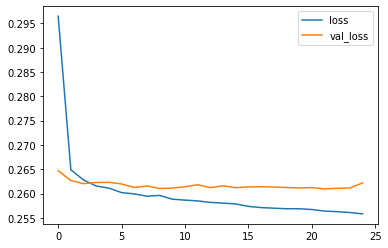

In [99]:
losses[['loss','val_loss']].plot()

Now we will create some predictions from our model and the display a classification report and confusion matrix from our model.

In [100]:
from sklearn.metrics import classification_report, confusion_matrix

In [101]:
predictions = model.predict_classes(X_test)

C:\Users\Hndof\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [103]:
print(classification_report(y_test,predictions))
confusion_matrix(y_test,predictions)

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



array([[ 6963,  8695],
       [  175, 63211]], dtype=int64)

WOW! From our model we had a very good precision rate in predicting whether or not someone would default on a loan! Our recall and f1-score need some improvement but overall content with the model's performance on the test data.

## Final Test: Given a random customer, determine if you would offer them a loan.

In [104]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

Now we use our model to create a prediction whether to offer the loan to the customer or not:

In [105]:
model.predict_classes(new_customer.values.reshape(1,78))

array([[1]])

Our model has predicted that we should approve this person's loan, **let us now see if this person actually paid back their loan:**

In [106]:
df.iloc[random_ind]['loan_repaid']

1.0

## SUCCESS!

## Thank you for checking out this notebook! I hope you have a fantastic day!